In [1]:
'''The purponse of this notebook is to simulate book reviews in light of C. S. Lewis's assertion that only those who love a genre can accurately judge a
book which belongs to it
'''

from ReviewClasses import *
from matplotlib import pyplot as plt

In [2]:
avg_category = CategoryHelper(Category.A, 'avg')
bimodal_category = CategoryHelper(Category.B, 'bimodal')
low_category = CategoryHelper(Category.C, 'low-weight')
high_category = CategoryHelper(Category.D, 'high-weight')
categories = [avg_category, bimodal_category, low_category, high_category]

In [3]:
works = []
merits = [0.5, 1.5, 2.5, 3.5, 4.5]

for cat in categories:
    for m in merits:
        works.append(Work(cat.category, m))


In [4]:
# assume: work_a, work_b, Reviewer, Category already defined
rng = np.random.default_rng()
num_reviewers = 1000

reviewers = []

for _ in range(num_reviewers):
    # truncated normal between 0 and 5 with mean 3, sd 0.5
    reviewer = Reviewer(categories)
    reviewers.append(reviewer)


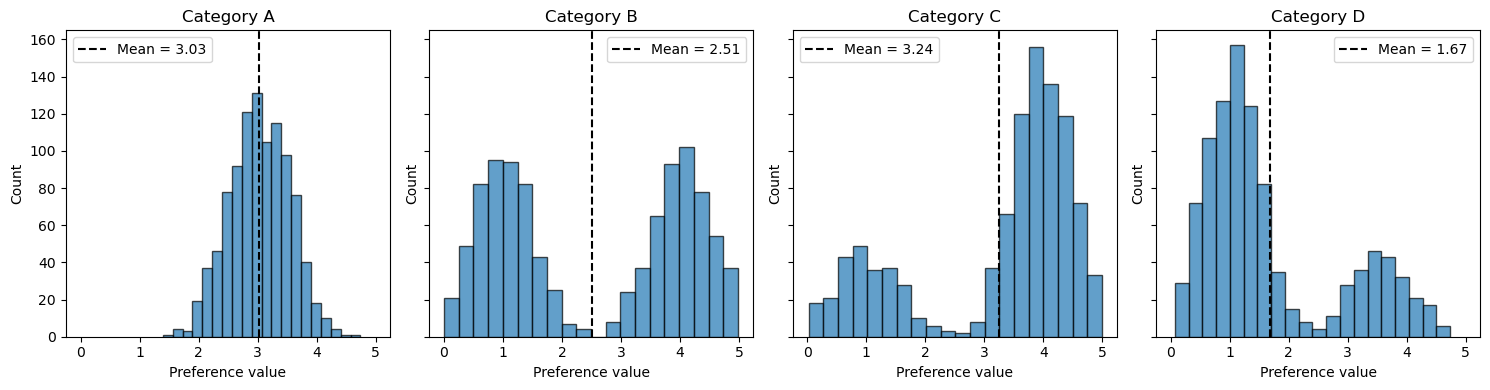

In [13]:

# --------------------------------------------------
# Category preference distributions
# reviewer.categories: {Category.A: prefA, Category.B: prefB}
# tol is the threshold (you called it `tol` when creating reviewers)
# --------------------------------------------------
prefs_A = np.array([rev.categories[Category.A] for rev in reviewers])
prefs_B = np.array([rev.categories[Category.B] for rev in reviewers])
prefs_C = np.array([rev.categories[Category.C] for rev in reviewers])
prefs_D = np.array([rev.categories[Category.D] for rev in reviewers])
prefs_dict = {
    Category.A : prefs_A,
    Category.B : prefs_B,
    Category.C : prefs_C,
    Category.D : prefs_D
}
tols    = np.array([rev.tol for rev in reviewers])   # assuming Reviewer has .tol
# 1D histograms for A and B with N label
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True, sharey=True)

# Panel 1: Category A
axes[0].hist(prefs_A, bins=20, edgecolor="black", alpha=0.7)
axes[0].axvline(prefs_A.mean(), color='black',linestyle='--',label=f'Mean = {prefs_A.mean():.2f}')
axes[0].set_title("Category A")
axes[0].set_xlabel("Preference value")
axes[0].set_ylabel("Count")
axes[0].legend()


# Panel 2: Category B
axes[1].hist(prefs_B, bins=20, edgecolor="black", alpha=0.7)
axes[1].axvline(prefs_B.mean(), color='black',linestyle='--',label=f'Mean = {prefs_B.mean():.2f}')
axes[1].set_title("Category B")
axes[1].set_xlabel("Preference value")
axes[1].set_ylabel("Count")
axes[1].legend()

# Panel 3: Category C
axes[2].hist(prefs_C, bins=20, edgecolor="black", alpha=0.7)
axes[2].axvline(prefs_C.mean(), color='black',linestyle='--',label=f'Mean = {prefs_C.mean():.2f}')
axes[2].set_title("Category C")
axes[2].set_xlabel("Preference value")
axes[2].set_ylabel("Count")
axes[2].legend()

# Panel 4: Category D
axes[3].hist(prefs_D, bins=20, edgecolor="black", alpha=0.7)
axes[3].axvline(prefs_D.mean(), color='black',linestyle='--',label=f'Mean = {prefs_D.mean():.2f}')
axes[3].set_title("Category D")
axes[3].set_xlabel("Preference value")
axes[3].set_ylabel("Count")
axes[3].legend()

plt.tight_layout()
plt.savefig('category_preferences.png',dpi=300)
plt.show()

In [6]:
for reviewer in reviewers:
    for work in works:
        will_review = rng.uniform(0, 5)
        if reviewer.categories[work.category] > will_review:
            r_a = reviewer.review(work)

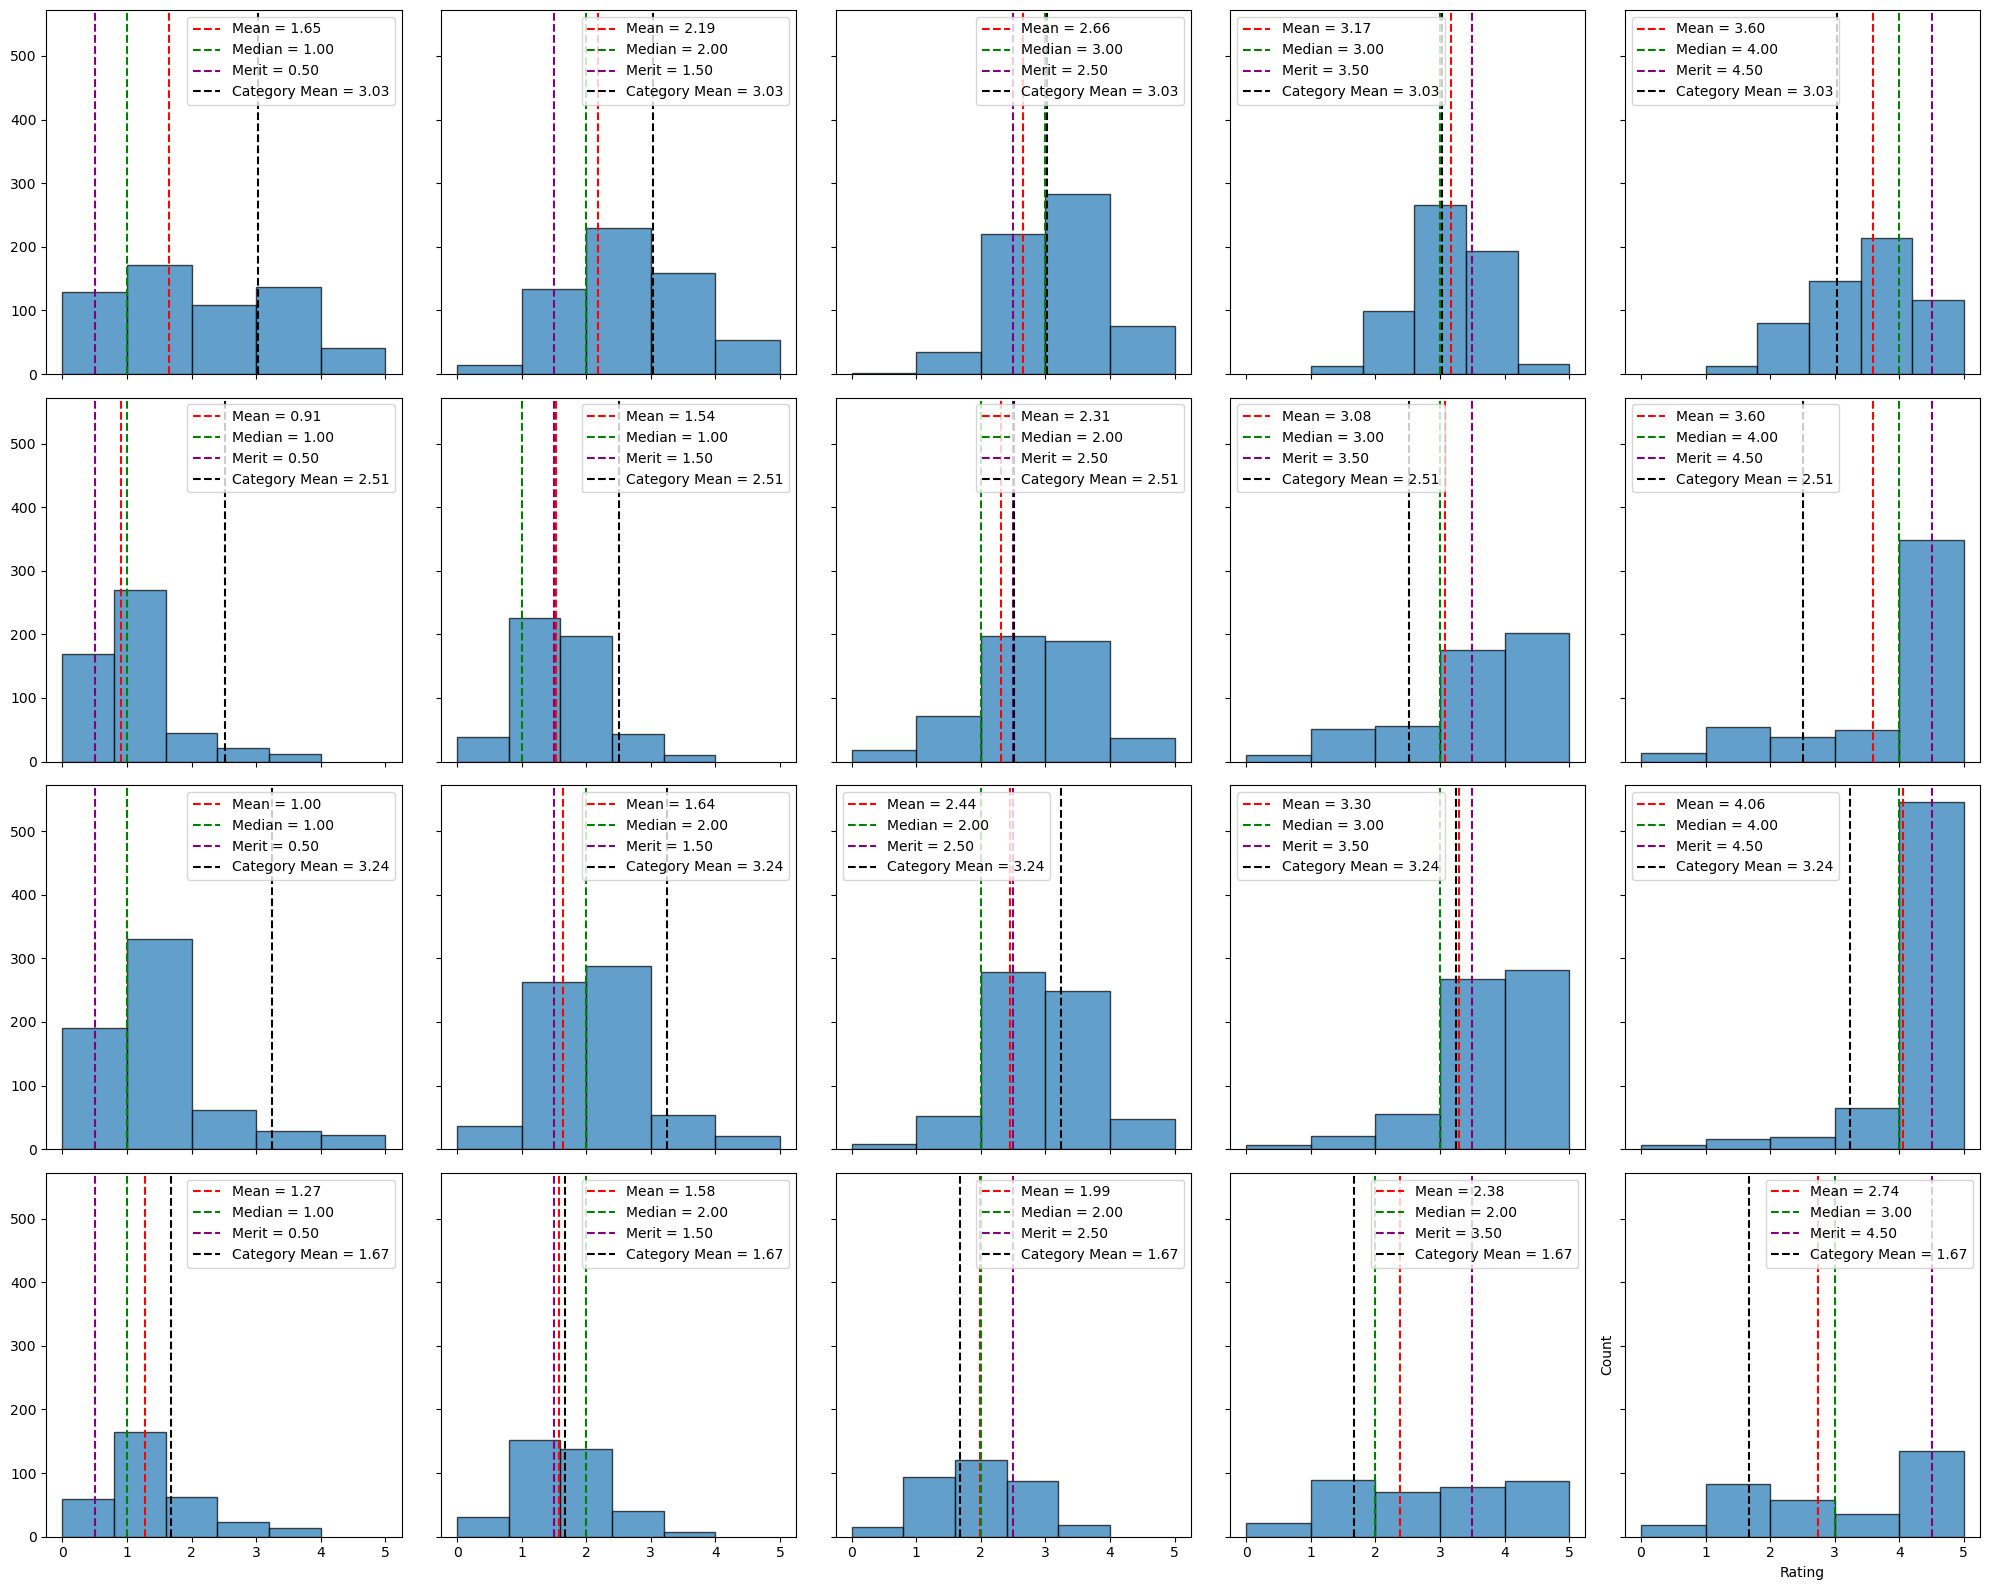

In [29]:
# --------------------------------------------------
# Histograms for ratings with mean/median and N
# --------------------------------------------------
fig, axes = plt.subplots(4, 5, figsize=(20, 16), sharex=True, sharey=True)

relative_differences = []
absolute_differences = []
deviations = []

for i, work in enumerate(works):
    ratings = np.array(work.reviews)
    ratings = np.round(ratings)

    mean, median, std = ratings.mean(), np.median(ratings), ratings.std()
    diff = mean - work.merit
    std_diff = diff / std

    relative_differences.append(std_diff)
    absolute_differences.append(diff)
    deviations.append(std)

    row_idx = i // 5
    column_idx = i % 5
    ax = axes[row_idx, column_idx]
    ax.hist(ratings, bins=5, edgecolor='black',alpha=0.7)
    ax.axvline(mean, color='red',linestyle='--',label=f'Mean = {mean:.2f}')
    ax.axvline(median, color='green',linestyle='--',label=f'Median = {median:.2f}')
    ax.axvline(work.merit, color='purple',linestyle='--',label=f'Merit = {work.merit:.2f}')
    ax.axvline(prefs_dict[work.category].mean(), color='black',linestyle='--',label=f'Category Mean = {prefs_dict[work.category].mean():.2f}')

    ax.legend()

plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('work_reviews.png',dpi=300)
plt.show()

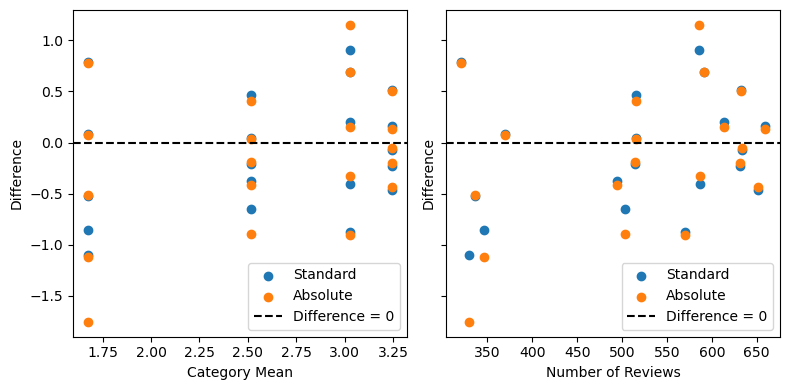

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey = True)

axs[0].scatter([prefs_dict[w.category].mean() for w in works], relative_differences, label='Standard')
axs[0].scatter([prefs_dict[w.category].mean() for w in works], absolute_differences, label='Absolute')
axs[0].axhline(0, color='black',linestyle='--',label='Difference = 0')
axs[0].set_xlabel('Category Mean')
axs[0].set_ylabel('Difference')
axs[0].legend()

axs[1].scatter([len(w.reviews) for w in works], relative_differences, label='Standard')
axs[1].scatter([len(w.reviews) for w in works], absolute_differences, label='Absolute')
axs[1].axhline(0, color='black',linestyle='--',label='Difference = 0')
axs[1].set_xlabel('Number of Reviews')
axs[1].set_ylabel('Difference')
axs[1].legend()

plt.tight_layout()
plt.show()

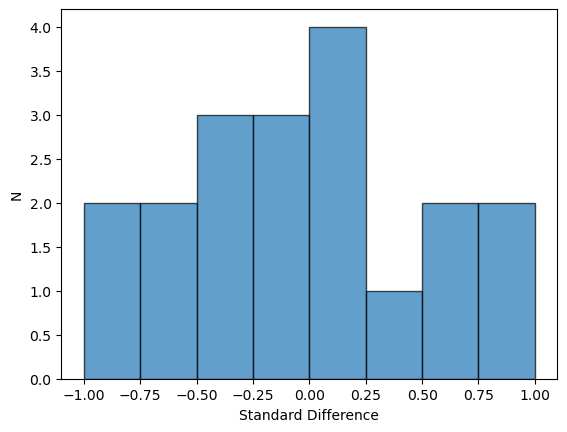

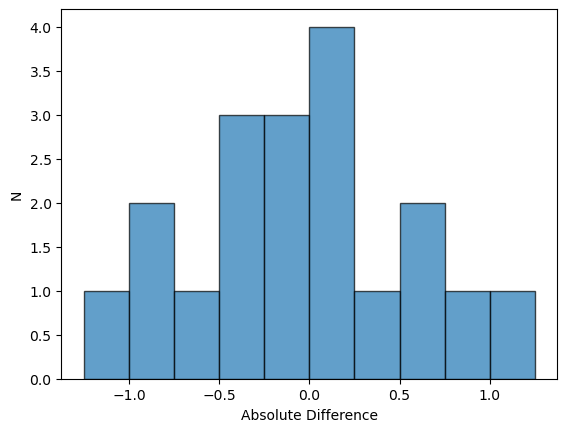

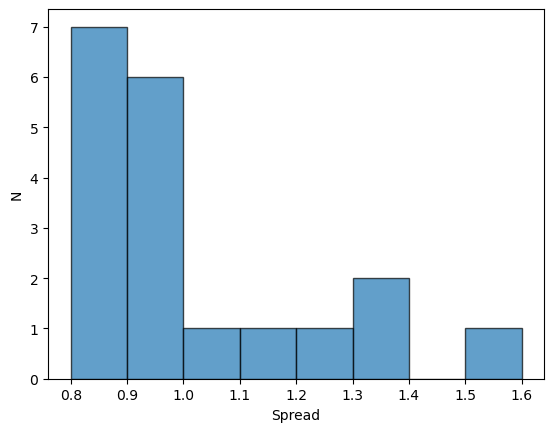

In [35]:
plt.hist(relative_differences, bins=[-1.25 + .25*i for i in range(1,10)], edgecolor='black',alpha=.7)
plt.xlabel('Standard Difference')
plt.ylabel('N')
plt.show()

plt.hist(absolute_differences, bins = [-1.25 + .25*i for i in range(11)],edgecolor='black',alpha=.7)
plt.xlabel('Absolute Difference')
plt.ylabel('N')
plt.show()


plt.hist(deviations, bins=[.8 + .1*i for i in range(9)], edgecolor='black',alpha=.7)
plt.ylabel('N')
plt.xlabel('Spread')
plt.show()